# Python & Scikit-Image : image processing
***

In this project, we going to cover image processing using the **Scikit Image** library. The aim is not to learn the library in detail.

Images have become an important source of digital data and therefore need to be processed. By enhancing the image, extracting the data and analyzing it, we are able to process the images and use them in various fields such as artificial intelligence, computer graphics, medical research and many others.

Due to its growing popularity and the availability of many easy-to-use libraries, Python is an excellent choice for image processing. There are many image processing libraries available in Python such as **Numpy**, **OpenCV**, Python Image Library **(PIL)**, etc. This tutorial focuses on **Scikit-image**. It is a fairly simple open source library for research, education and industrial applications. It has a lot of algorithms for segmentation, color manipulation, filtering, etc. It can be used in many different ways.

But before going any further, let's take a look at the basics of the digital image. An image, in digital form, is composed of pixels. These are the smallest units of information that make up an image. A simple way to describe each pixel is to use a combination of three channels (colors), namely red, green and blue. On the other hand, a grayscale image contains only one channel (gray) covering different shades of black and white and the pixels are represented by a single value between 0 and 255.

Now you can get started! Let's go. 

## First steps with Scikit-image
***

In [2]:
# package import
import skimage

### 1.1. Import an image
***
The essential step in any processing is the loading of the image. To perform this task, it is necessary to import the **io** module and use the **imread()** function by passing the path to the image file **coins.png**. This should return a numpy.(nd)array object, which we will place in the image variable :

In [21]:
from skimage import io
image = io.imread('../image_deep_learning/data/coins.png')

Since the imported image is in the form of a numpy vector, we will use the **dtype** and **shape** attributes to extract some information. You can see the tutorial __[The basics of image processing in Python : NumPy library](https://www.cours-gratuit.com/tutoriel-python/tutoriel-python-les-bases-de-traitement-dimages-en-python-bibliothque-numpy)__ , to learn how to process images with NumPy.

In [22]:
# informations
print( 'classe :', type(image) )
print( 'type :', image.dtype )
print( 'taille :', image.shape )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (246, 300)


Note that our imported image is a vector of class **numpy.array** containing values of type **uint8** (integer) of 1 dimension whose shape is (height, width)

### Show an image
***
You can display the image using the **imshow()** function of the io module:

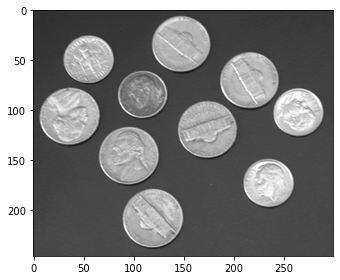

In [5]:
io.imshow(image)
io.show()

The previous script applies the **imshow()** and **show()** functions. **imshow()** displays an image and **show()** displays the images queued by imshow. To better understand this, we will use Scikit Image's **data** module (**skimage**) which contains pre-loaded images (standard demo images that can be used for testing). The following script displays two images (**astronaut** and **coffee**) from this module :

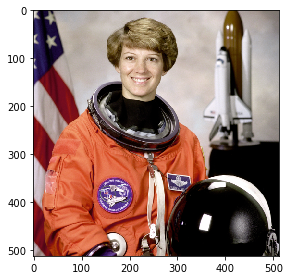

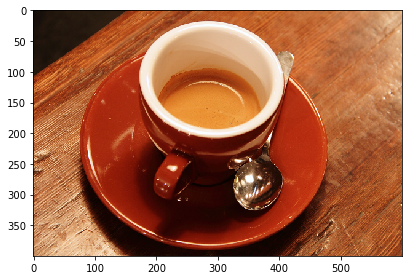

In [6]:
from skimage import data
image_1 = data.astronaut()
image_2 = data.coffee()
io.imshow( image_1 )
# this query io.show() is mandatory to show both images simultaneously
io.show()
io.imshow( image_2 )
io.show()

You can use the **dir()** function (which allows you to list the content of an object) to display all the images available in the **data** module.


### Save an image 
***
You can save your image with the **imsave()** function of the **io** module. The **imsave()** function takes the location and the image to be saved as parameters. The format of the saved file is automatically determined from the extension 

In [71]:
io.imsave('../image_deep_learning/data/SavedCoins.png', image) 

## Manipulating an image 
***
Let's get down to business! The goal is to learn how to manipulate images using the **Scikit Image** library and to understand the basics with a concrete example. For this we will use our test image

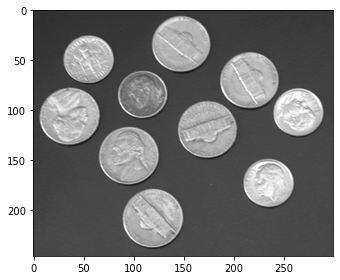

In [8]:
io.imshow( image )
io.show()

###  Histogram of pixels
***
We display the histogram of our image which represents the distribution of the pixels according to their intensity (from 0 to 255). The three channels (red, green and blue) each have a corresponding histogram. To create the histogram of our test image, we will use the **histogram()** function of the **exposure** module. To plot it, we use the **matplotlib** library (make sure the matplotlib library is installed). The following script displays the histogram of the pixels of our test image for each channel. As our test image is in shade of gray, only one channel is present. You can do the same test by changing the test image to another image in color (astronaut or coffee, as seen before)

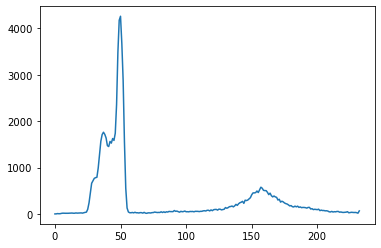

In [9]:
from skimage import exposure
import matplotlib.pyplot as plt

# Histogram of coins image
plt.subplots()
hist = exposure.histogram( image)
plt.plot(hist[0])


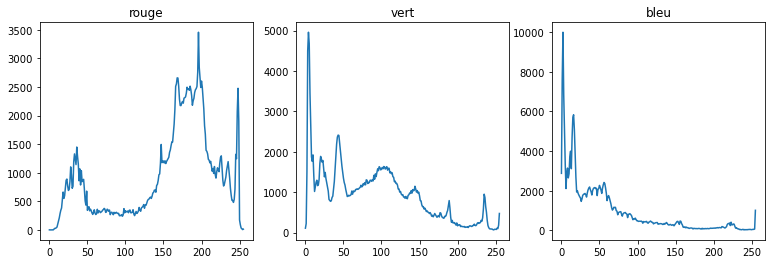

In [69]:
# Histogram of Coffee image
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (13,4))
canals = ['rouge', 'vert', 'bleu']
for i, canal in enumerate(canals):
    hist = exposure.histogram( image_2[: , : , (i)] )
    #print(hist[0])
    ax[i].plot(hist[0])
    ax[i].set_title(canal)

In [48]:
canals = ['rouge', 'vert', 'bleu']
for i, canal in enumerate(canals):
    print(i)

0
1
2


### Convert a color image in shade of gray
***
A color image (RGB mode) can be converted to a gray scale. A grayscale image does not have a channel since it does not give any information about the colors, so the complexity of the calculation is reduced when it is used. To convert a color image to a grayscale image, use the **rgb2grey()** function of the **color** module which takes the original image as parameters. The script is as follows:

<ipython-input-41-a954d060667e>:3: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey_image = color.rgb2grey( image_1 )


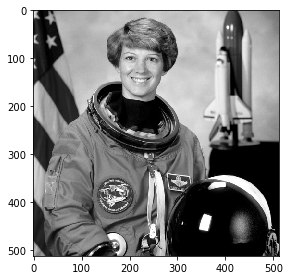

In [41]:
from skimage import color

grey_image = color.rgb2grey( image_1 )
#grey_image = color.rgb2grey( image_2 )
io.imshow( grey_image )
io.show()

**Note**: The grayscale image generated from the **rgb2grey()** function has normalized pixel values (between 0 and 1). You have to multiply by 255 to have values between 0 and 255.

### Segementation 
***
The purpose of image segmentation is to label each pixel of an image with a corresponding class. There are several ways to do this, the simplest is to segment the image into two regions (foreground and background). This is equivalent to converting the image into shades of gray, and setting a threshold. Pixels whose value is above the threshold are treated as belonging to the first region, and the other pixels (below the threshold) to the second region.

The filters module of the skimage library contains several algorithms that allow to choose the segmentation threshold. First, let's call all the thresholding algorithms using the **try_all_threshold** function. Their application on our test image generates several segmented images:

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


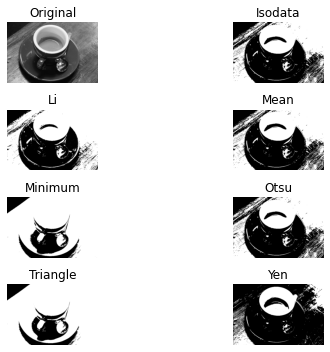

In [37]:
from skimage import filters
filters.try_all_threshold( grey_image )
io.show()


***
 - Import the pre-loaded image 'data.coins' in the **data** module
 - Display the image
 - Display the histogram of the pixel intensities
 - Peform a manual segmentation with two different thresholds to see the impact. Try with $i) \;  \tau = 80$ and $ii) \; \tau =137$  
 - Display the segmented images

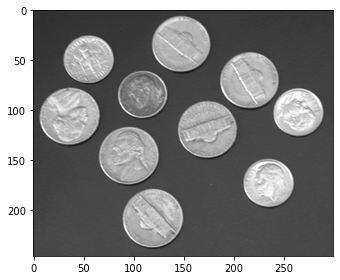

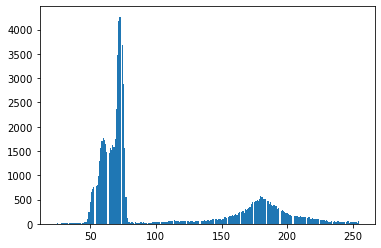

In [29]:
# import the image 
image_coins =io.imread('../image_deep_learning/data/coins.png')

# display the image 
io.imshow(image)
io.show()


# display the histogram of the pixel intensities
# Histogram of coins image
V_image_coins = image_coins.flatten() # gather the image in one dimension vector 
plt.hist(image_coins.flatten(), bins=255 )# plot the histogram of the image 
plt.show()


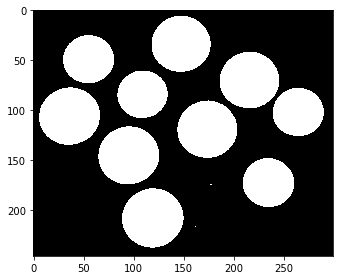

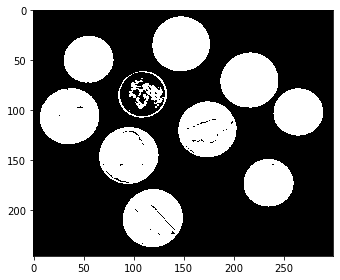

In [30]:
io.imshow(image_coins > 80)
io.show()
io.imshow(image_coins >137)
io.show()

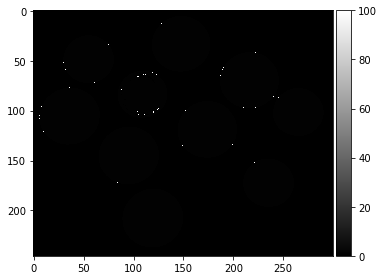

In [36]:
image_coins_T80 = image_coins.copy()
image_coins_T80[image_coins_T80< 100] = 0
image_coins_T80[image_coins_T80 > 100] = 1
io.imshow(image_coins_T80, cmap = 'gray')
io.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

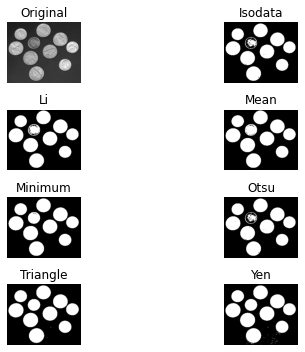

In [39]:
from skimage import filters 
filters.try_all_threshold(image_coins)